In [1]:
#https://analyticsindiamag.com/lets-learn-dabl-a-python-tool-for-data-analysis-and-ml-automation/
!pip install dabl

     |████████████████████████████████| 563kB 2.8MB/s 
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=565077 sha256=76711bab8c8244ff4912d0c2ff1c9bc2f58599224da2e07f5ab83d1a95980875
  Stored in directory: /root/.cache/pip/wheels/99/8c/79/9d33959b9b8676bf88a2e792075a2a17eda6b1711dc0fedca3
Successfully built dabl


In [3]:
import numpy as np
import dabl
import pandas as pd
db_data = pd.read_csv('diabetes.csv')
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
db_clean = dabl.clean(db_data, verbose=1)

Detected feature types:
2 float, 7 int, 0 object, 0 date, 0 other
Interpreted as:
continuous      7
dirty_float     0
low_card_int    1
categorical     1
date            0
free_string     0
useless         0
dtype: int64


In [5]:
type_info = dabl.detect_types(db_clean)

In [6]:
type_info

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Pregnancies,False,False,True,False,False,False,False
Glucose,True,False,False,False,False,False,False
BloodPressure,True,False,False,False,False,False,False
SkinThickness,True,False,False,False,False,False,False
Insulin,True,False,False,False,False,False,False
BMI,True,False,False,False,False,False,False
DiabetesPedigreeFunction,True,False,False,False,False,False,False
Age,True,False,False,False,False,False,False
Outcome,False,False,False,True,False,False,False


In [7]:
db_clean = dabl.clean(db_data, type_hints={"Pregnancies": "categorical"})

In [8]:
db_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:528: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 2 outliers in column BMI.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 3 outliers in column DiabetesPedigreeFunction.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 2 outliers in column Insulin.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 4 outliers in column SkinThickness.
  int(dropped), series.name), UserWarning)


Target looks like classification
Linear Discriminant Analysis training set score: 0.717


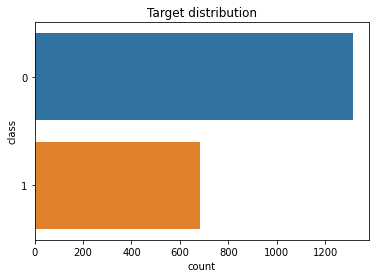

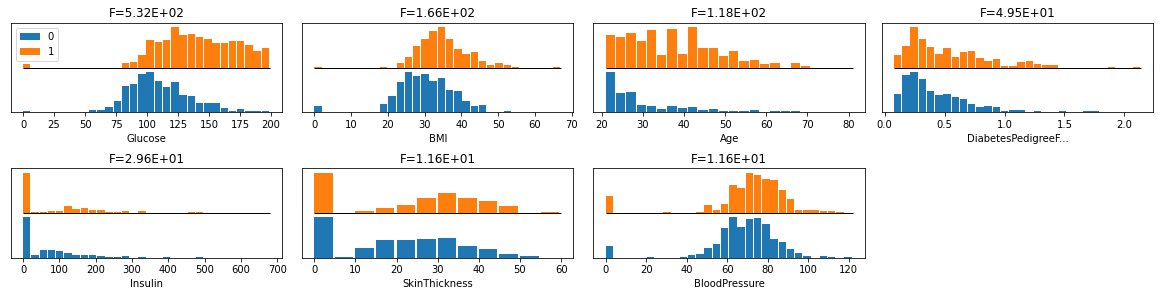

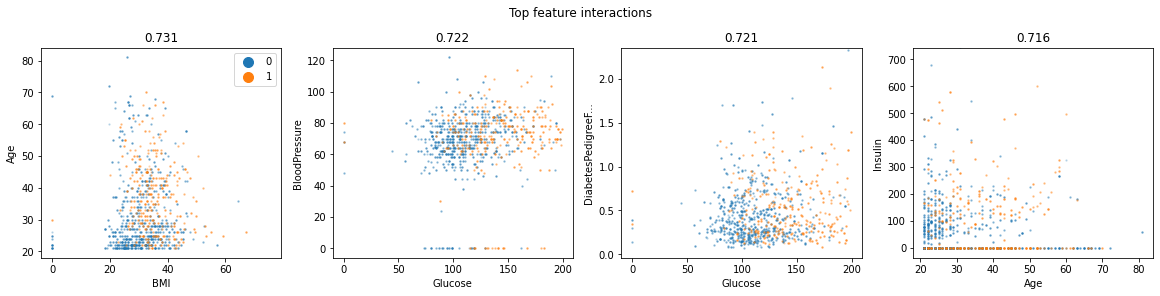

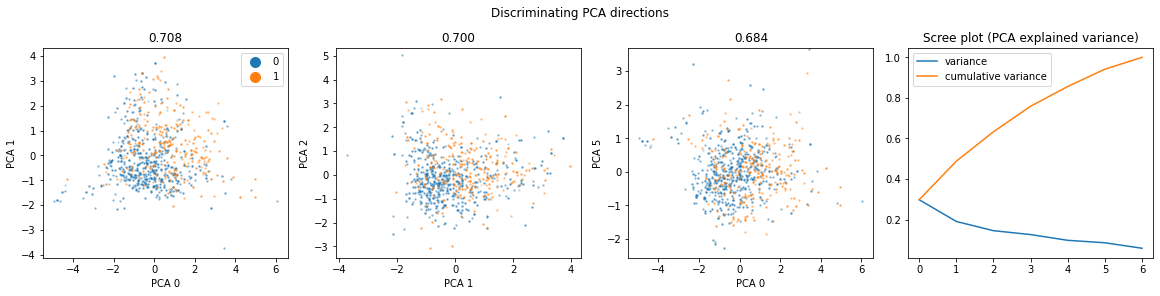

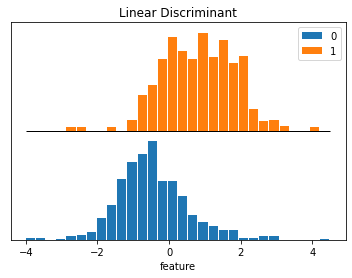

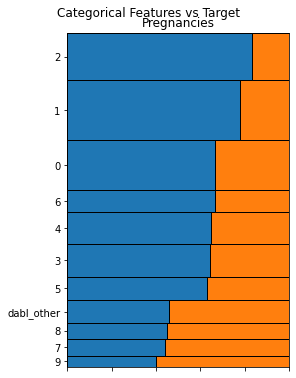

In [9]:
dabl.plot(db_clean, 'Outcome')

In [10]:
classifier = dabl.SimpleClassifier(random_state=0)
x = db_clean.drop('Outcome', axis=1)
y = db_clean.Outcome
classifier.fit(x, y)

Running DummyClassifier(strategy='prior')
accuracy: 0.658 average_precision: 0.342 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.397
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.658 average_precision: 0.342 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.397

Running GaussianNB()
accuracy: 0.668 average_precision: 0.597 roc_auc: 0.768 recall_macro: 0.522 f1_macro: 0.453
=== new best GaussianNB() (using recall_macro):
accuracy: 0.668 average_precision: 0.597 roc_auc: 0.768 recall_macro: 0.522 f1_macro: 0.453

Running MultinomialNB()
accuracy: 0.685 average_precision: 0.530 roc_auc: 0.687 recall_macro: 0.587 f1_macro: 0.583
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.685 average_precision: 0.530 roc_auc: 0.687 recall_macro: 0.587 f1_macro: 0.583

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.723 average_precision: 0.505 roc_auc: 0.713 recall_macro: 0.713 f1_macro: 0.703
=== new best DecisionTreeClas

SimpleClassifier(random_state=0, refit=True, shuffle=True, type_hints=None,
                 verbose=1)